In [ ]:
 !pip install mysql-connector-python-rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#connecting the database 
import mysql.connector
host_name = 'database-1-yelp-data.c4d8re67ta4m.us-east-2.rds.amazonaws.com'
database_name = 'yelp_project'
cnx = mysql.connector.connect(user='admin123', host = host_name, database = database_name, port = '3306', password = 'DB_project')
cursor = cnx.cursor()

query = ('''select r.business_id,r.stars from review r;
''')

cursor.execute(query)

users0 = cursor.fetchall()
users0

cursor.close()
cnx.close()

<Axes: ylabel='Density'>

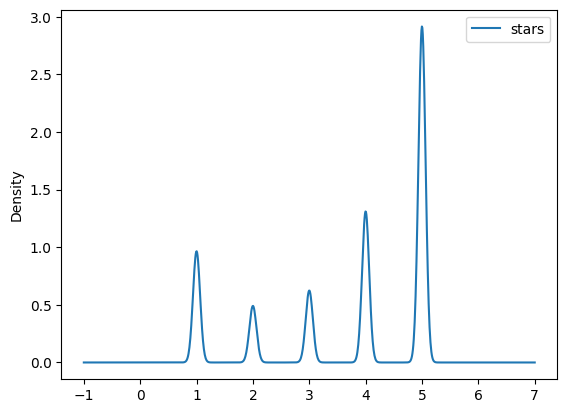

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import scipy.stats as stats
import seaborn as sns

#probability distribution of all the businesses
df0 = pd.DataFrame(users0)
df0.rename(columns={0:"business_id", 1:"stars"},inplace=True)
df0.plot.kde()

In [ ]:
import mysql.connector
host_name = 'database-1-yelp-data.c4d8re67ta4m.us-east-2.rds.amazonaws.com'
database_name = 'yelp_project'
cnx = mysql.connector.connect(user='admin123', host = host_name, database = database_name, port = '3306', password = 'DB_project')
cursor = cnx.cursor()

query = ('''select r.business_id,r.stars from review r inner join user u on r.user_id= u.user_id where r.stars>=4;
''')

cursor.execute(query)

users = cursor.fetchall()
users

cursor.close()
cnx.close()

<Axes: ylabel='Density'>

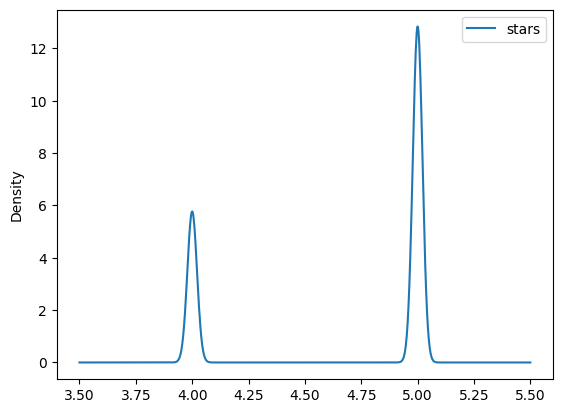

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import scipy.stats as stats
import seaborn as sns

#probability distribution of all users for high rated businessess
df = pd.DataFrame(users)
df.rename(columns={0:"business_id", 1:"stars"},inplace=True)
df.plot.kde()

In [ ]:
host_name = 'database-1-yelp-data.c4d8re67ta4m.us-east-2.rds.amazonaws.com'
database_name = 'yelp_project'
cnx = mysql.connector.connect(user='admin123', host = host_name, database = database_name, port = '3306', password = 'DB_project')
cursor = cnx.cursor()

query = ('''select r.business_id,r.stars from review r inner join user u on r.user_id= u.user_id where r.stars>=4 and u.review_count<=10;
''')

cursor.execute(query)

users1 = cursor.fetchall()
users1

cursor.close()
cnx.close()

<Axes: ylabel='Density'>

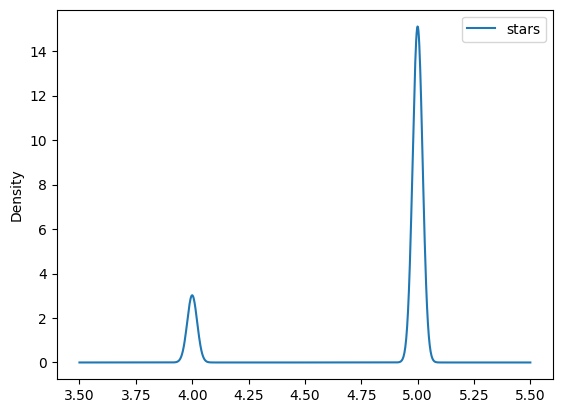

In [ ]:
#probability distribution of users less tham 10 review count for high rated businessess
df1 = pd.DataFrame(users1)
df1.rename(columns={0:"business_id", 1:"stars"},inplace=True)
df1.plot.kde()

In [ ]:
#creating a new data frame with ratings of all users and users less than 10 review count
df3 = pd.DataFrame()
df3['df_stars']=df['stars']
df3['df1_stars'] = df1['stars'].astype(int)
df3.rename(columns={"df_stars":"all users","df1_stars":"users with review count<10"},inplace=True)

<Axes: ylabel='Density'>

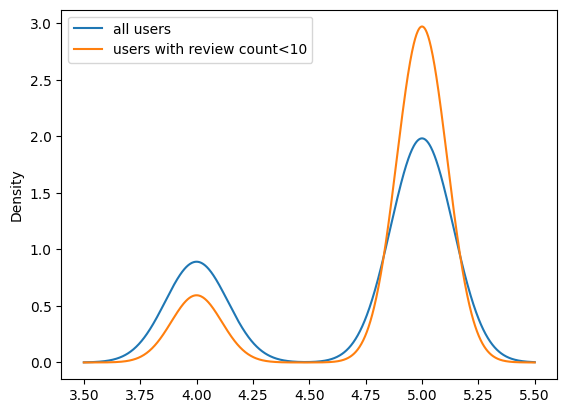

In [ ]:
#plotting all users and users less than 10 review count
df3.plot.kde(bw_method=0.3)